Please **submit this Jupyter notebook through Canvas** no later than **Monday November 16, 15:00**.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Roland Bumbuc: 13451898  Samuel Russell: 11602805

-----
# Exercise 1

# (a)
We have the table of data in the next cell.

Using `numpy.linalg.lstsq()`, fit a straight line, a quadratic function, and a cubic function to these data. Plot the data and your fitted functions in a graph. It is **not** allowed to use numpy.polyfit, but you may have a look at the documentation to see some examples.

In [1]:
import numpy as np
t = np.array([3, 11, 29, 32, 47, 63, 73, 99], dtype=np.float)
w = np.array([74, 72, 52, 35, 37, 20, 19, 19], dtype=np.float)

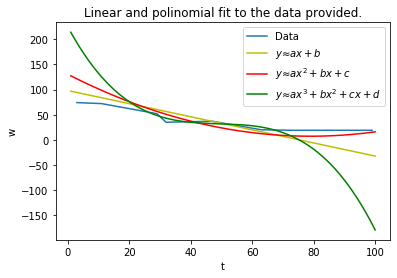

In [2]:
import matplotlib.pyplot as plt

A = np.vstack([np.ones_like(w),w]).transpose()

B = t.transpose()


x_1, res_1, rank_1 ,s_1 = np.linalg.lstsq(A,B, rcond=-1)

plt.plot(t,w,label='Data')

w_ = np.linspace(1,100,10000)

#f(w) = aw + b
a=x_1[1]
b=x_1[0]

t_one_degree = a*w_ + b

A_2 = np.vstack([np.ones_like(w),w,w**2]).transpose()
A_3 = np.vstack([np.ones_like(w),w,w**2,w**3]).transpose()

x_2, res_2, rank_2 ,s_2 = np.linalg.lstsq(A_2,B, rcond=-1)
a=x_2[2]
b=x_2[1]
c=x_2[0]

t_two_degree = a*w_**2 + b*w_ + c

x_3, res_3, rank_3 ,s_3 = np.linalg.lstsq(A_3,B, rcond=-1)
a=x_3[3]
b=x_3[2]
c=x_3[1]
d=x_3[0]
t_three_degree = a*w_**3 + b*w_**2 + c*w_ + d


plt.legend()
plt.title("Linear and polinomial fit to the data provided.")
plt.plot(w_,t_one_degree,label ='$y≈ax+b$', c='y' )
plt.plot(w_,t_two_degree,label ='$y≈ax^2+bx+c$', c='r')
plt.plot(w_,t_three_degree,label = '$y≈ax^3+bx^2+cx+d$', c='g' )
plt.xlabel("t")
plt.ylabel("w")
plt.legend()

## (b)
Compute the condition number of the associated Vandermonde matrix in each case.

Condition number is defined by:
$$||A|| \cdot ||A^{-1}||=\big(max_{x\neq 0}\frac{||Ax||}{||x||}\big) \cdot \big(min_{x\neq 0}\frac{||Ax||}{||x||}\big)^{-1}$$


In [3]:
print("Condition number associated with the vandermonde matrix n = 1: ",np.linalg.cond(A,2))
print("Condition number associated with the vandermonde matrix n = 2: ",np.linalg.cond(A_2,2))
print("Condition number associated with the vandermonde matrix n = 3: ",np.linalg.cond(A_3,2))

Condition number associated with the vandermonde matrix n = 1:  100.23747084432149
Condition number associated with the vandermonde matrix n = 2:  16564.401569902064
Condition number associated with the vandermonde matrix n = 3:  4165293.453696648


----
# Exercise 2
Planets follow an elliptical orbit, which can be represented in a Cartesian $(x,y)$-coordinate system by the equation
$$ ay^2 + bxy + cx + dy + e = x^2. $$

## (a)
Use `numpy.linalg.lstsq()` to determine the orbital parameters $a,b,c,d,e$ for the table of observations given below.
In addition, plot the resulting orbit and the data points in the $(x,y)$-plane.

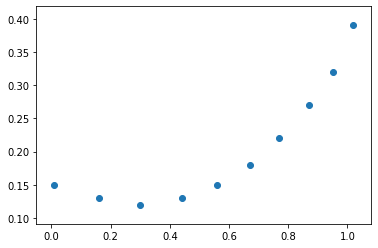

In [4]:
x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01], dtype=np.float)
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15], dtype=np.float)

import matplotlib.pyplot as plt
t = np.linspace(0, 2*np.pi, 101)

plt.scatter(x,y)
plt.show()

In [5]:
# Extract x coords and y coords of the ellipse as column vectors
X = np.transpose(x)
Y = np.transpose(y)

A = np.stack([Y**2, X * Y, X, Y, np.ones(10,)]).transpose()
b = np.stack([X**2]).transpose()
print(A.shape)
print(b.shape)
x_solns, residuals, rank, s = np.linalg.lstsq(A, b,rcond=-1)

x_solns

(10, 5)
(10, 1)


array([[-2.63562548],
       [ 0.14364618],
       [ 0.55144696],
       [ 3.22294034],
       [-0.43289427]])

$$ ay^2 + bxy + cx + dy + e = x^2. $$ 

$$ -2.63562548y^2 +  0.14364618xy + 0.55144696x + 3.22294034y + -0.43289427 = x^2. $$
$$ -x^2 -2.63562548y^2 +  0.14364618xy + 0.55144696x + 3.22294034y + -0.43289427 = 0. $$

The latter we may view as f(x,y) which we can plot in a contour. 

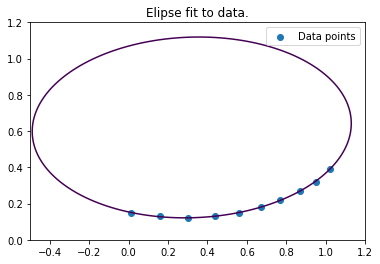

In [6]:
x_ = np.linspace(-0.5,1.2,1000)
y_ = np.linspace(0,1.2,1000)

x_,y_ = np.meshgrid(x_,y_)

plt.title('Elipse fit to data.')
plt.contour(x_,y_,(-x_**2 + x_solns[0]*y_**2 + x_solns[1]*x_*y_ + x_solns[2]*x_ + x_solns[3]*y_ +x_solns[4] ),[0])
plt.scatter(x,y, label='Data points')
plt.xlim([-0.5,1.2])
plt.ylim([0,1.2])
plt.legend()


## (b)
This least squares problem is nearly rank-deficient. To see what effect this has on the solution, perturb the input data slightly by adding random noise between -0.005 and 0.005 (using, for instance, `numpy.random.rand`), and solve the least squares problem with the perturbed data. Compare the new values for the parameters with those from (a). What effect does this difference have on the plot of the orbit?

In [7]:
# Extract x coords and y coords of the ellipse as column vectors
x_r = x+np.random.uniform(-0.005,0.005, len(x))
y_r = y+np.random.uniform(-0.005,0.005, len(y))
X_rand = x_r.T
Y_rand = y_r.T

A_rand = np.stack([Y_rand**2, X_rand * Y_rand, X_rand, Y_rand, np.ones(10,)]).transpose()
b_rand = np.stack([X_rand**2]).transpose()
print(A.shape)
print(b.shape)
x_solns_rand, residuals_rand, rank_rand, s_rand = np.linalg.lstsq(A_rand, b_rand,rcond=-1)

x_solns_rand

(10, 5)
(10, 1)


array([[-1.65513178],
       [-0.11334448],
       [ 0.59954381],
       [ 2.93436404],
       [-0.41481089]])

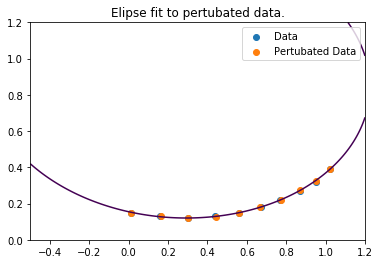

In [8]:
x_ = np.linspace(-0.5,1.2,1000)
y_ = np.linspace(0,1.2,1000)

x_,y_ = np.meshgrid(x_,y_)

plt.title('Elipse fit to pertubated data.')
plt.contour(x_,y_,(-x_**2 + x_solns_rand[0]*y_**2 + x_solns_rand[1]*x_*y_ + x_solns_rand[2]*x_ + x_solns_rand[3]*y_ +x_solns_rand[4] ),[0])
plt.scatter(x,y, label='Data')
plt.scatter(x_r,y_r, label='Pertubated Data')
plt.xlim([-0.5,1.2])
plt.ylim([0,1.2])
plt.legend()


In [9]:
x_solns_rand-x_solns

array([[ 0.98049371],
       [-0.25699066],
       [ 0.04809685],
       [-0.2885763 ],
       [ 0.01808338]])

What effect does this difference have on the plot of the orbit?

Comparing the solutions and figures from part a and b we see that small pertubations, in the datapoints create large differences between our coefficients and thus in the resulting elliptical plots. Running the cells a few times we observe that the resulting fit can differ a lot between the two sometimes the plot is bigger, sometimes smaller - sometimes the first coefficients have a much larger difference, sometimes the middle coefficients.

In [10]:
print(residuals)
print(residuals_rand)


[0.00014824]
[0.00035379]


## (c)
Can you explain this behaviour?

From np.linalg.lstsq: If `a` is square and of full rank, then `x` (but for round-off error)
is the "exact" solution of the equation.Otherwise it minimizes the squared Euclidean 2-norm. 

Firstly as we are solving a non square matrix problem we are looking for an approximate solution to a QR factorization problem. 

we notice small pertubations in the data seem to fluctuate the result of the residuals, in which heavily affects the minimization of the euclidean 2-norm. Causing the solution to be slightly different which shows large differences on the ellipse.

## (d)
Solve the same least squares problem again, for both the original *and* the perturbed data, this time using a routine specifically designed to deal with rank deficiencies. An example is `numpy.linalg.lstsq`, with the argument `rcond` as tolerance. Experiment with various tolerances, say $10^-k$ for $k \in \{1, ..., 5\}$. Compare the behaviour of the two solutions (one for the original input data, one for the perturbed data). How well do the resulting orbits fit the data points as the tolerance varies?

In [11]:
# Extract x coords and y coords of the ellipse as column vectors
def plot_difference_rcond(x,y,x_r,y_r, rcond):
    X = np.transpose(x)
    Y = np.transpose(y)
    X_rand = x_r.T
    Y_rand = y_r.T

    A = np.stack([Y**2, X * Y, X, Y, np.ones(10,)]).transpose()
    b = np.stack([X**2]).transpose()

    x_solns, residuals, rank, s = np.linalg.lstsq(A, b,rcond=rcond)

    A_rand = np.stack([Y_rand**2, X_rand * Y_rand, X_rand, Y_rand, np.ones(10,)]).transpose()
    b_rand = np.stack([X_rand**2]).transpose()
    x_solns_rand, residuals_rand, rank_rand, s_rand = np.linalg.lstsq(A_rand, b_rand,rcond=rcond)
    x_ = np.linspace(-1,1.5,1000)
    y_ = np.linspace(-1,1.5,1000)

    x_,y_ = np.meshgrid(x_,y_)
    print('Difference between x_solns: ', x_solns - x_solns_rand)
    plt.title('Difference between pertubated data fit(red) and original fit(green)')
    
    plt.contour(x_,y_,(-x_**2 + x_solns[0]*y_**2 + x_solns[1]*x_*y_ + x_solns[2]*x_ + x_solns[3]*y_ +x_solns[4] ),[0],colors='green')
    plt.contour(x_,y_,(-x_**2 + x_solns_rand[0]*y_**2 + x_solns_rand[1]*x_*y_ + x_solns_rand[2]*x_ + x_solns_rand[3]*y_ +x_solns_rand[4] ),[0],colors='red')
    
    plt.scatter(x,y, label='Data')
    plt.scatter(x_r,y_r, label='Pertubated Data')
    plt.xlim([-1,1.5])
    plt.ylim([-1,1.5])
    plt.legend()
    
    

Difference between x_solns:  [[ 0.00191992]
 [ 0.00093508]
 [-0.00279896]
 [ 0.00361406]
 [ 0.00059522]]


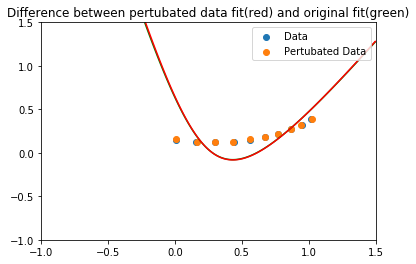

In [12]:

x_r = x+np.random.uniform(-0.005,0.005, len(x))
y_r = y+np.random.uniform(-0.005,0.005, len(y))

plot_difference_rcond(x,y,x_r,y_r, 10**-1)

Difference between x_solns:  [[-0.011869  ]
 [-0.02555608]
 [ 0.01275052]
 [-0.03229032]
 [ 0.00353097]]


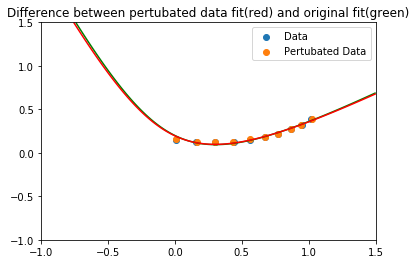

In [13]:
plot_difference_rcond(x,y,x_r,y_r, 10**-2)

Difference between x_solns:  [[-1.38341011]
 [ 0.31115201]
 [-0.06291179]
 [ 0.40784727]
 [-0.02194378]]


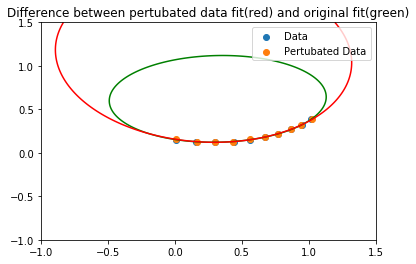

In [14]:
plot_difference_rcond(x,y,x_r,y_r, 10**-3)

Difference between x_solns:  [[-1.38341011]
 [ 0.31115201]
 [-0.06291179]
 [ 0.40784727]
 [-0.02194378]]


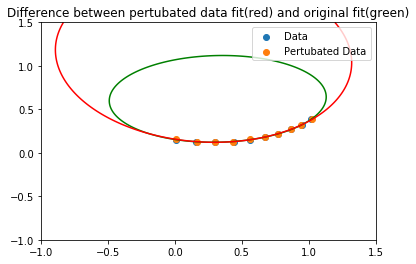

In [15]:
plot_difference_rcond(x,y,x_r,y_r, 10**-4)

Difference between x_solns:  [[-1.38341011]
 [ 0.31115201]
 [-0.06291179]
 [ 0.40784727]
 [-0.02194378]]


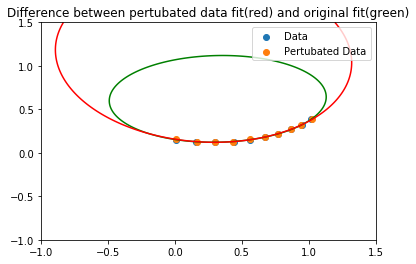

In [16]:
plot_difference_rcond(x,y,x_r,y_r, 10**-5)

Difference between x_solns:  [[-0.011869  ]
 [-0.02555608]
 [ 0.01275052]
 [-0.03229032]
 [ 0.00353097]]


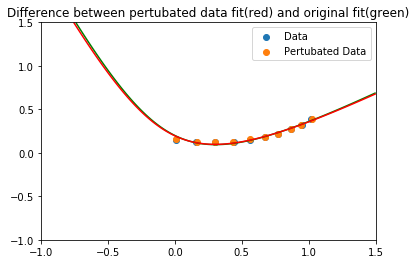

In [17]:
DP = np.linspace(10**-2, 10**-3, 4)
plot_difference_rcond(x,y,x_r,y_r, DP[0])

Difference between x_solns:  [[-0.34803395]
 [-0.30304285]
 [ 0.02842667]
 [ 0.47253993]
 [-0.05210213]]


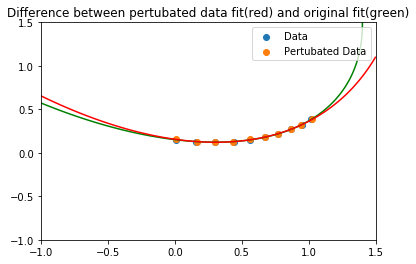

In [18]:
plot_difference_rcond(x,y,x_r,y_r, DP[2])

Difference between x_solns:  [[-1.38341011]
 [ 0.31115201]
 [-0.06291179]
 [ 0.40784727]
 [-0.02194378]]


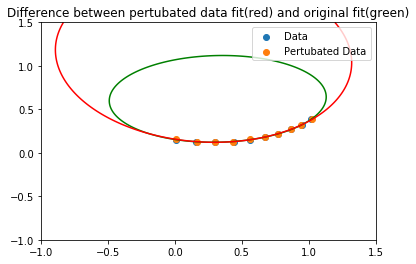

In [19]:
plot_difference_rcond(x,y,x_r,y_r, DP[3])

Compare the behaviour of the two solutions (one for the original input data, one for the perturbed data). How well do the resulting orbits fit the data points as the tolerance varies?

With a low tolerence i.e. low k value, both datapoints fit to the same ellipse - the difference between the calculated coefficients is small. As we increase k and higher the tolerence the difference between the calculated coeffiencts starts to rise and under a certain threshold of tolerence ($10^{-2},10^{-3}$) the different datapoints cause different coefficients to be converged towards. 